In [ ]:
!pip install -U datasets

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
from collections import Counter
import re
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
dataset = load_dataset("udmurtNLP/udmurt-russian-parallel-corpora")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/13.1M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/101833 [00:00<?, ? examples/s]

In [ ]:
df = pd.DataFrame(dataset['train'])

In [ ]:
df.head()

,ru,udm
0,"Каждый день над рабочей слободкой, в дымном, м...","Рабочийёслэн слободказы вадьсын, ӵыно, вӧё омы..."
1,В холодном сумраке они шли по немощеной улице ...,Кезьыт ӵукна ӝомытын соос изэн вӧлдымтэ урам к...
2,Грязь чмокала под ногами.,Пыд улын дэри тяпкетылӥз.
3,Раздавались хриплые восклицания сонных голосов...,Кылӥськылӥзы кӧлэм бере кежыр луэм куараос. Ур...
4,"Угрюмо и строго маячили высокие черные трубы, ...",Слободка вадьсы зӧк бодыос выллем ӝутскем ӝужы...


In [ ]:
len(df)

101833

In [ ]:
def count_words(text, lang='other'):
    #Количество слов
    #For agglutinative languages, we may need complex word segmenter based on morphological analysis.(?)
    return len(text.split())

def count_chars(text):
    #символы
    return len(text)

def count_tokens(text, tokenizer=None):
    #токен
    if tokenizer is None:
        return len(text.split())
    else:
        return len(tokenizer.tokenize(text))

In [ ]:
# 1. EDA
# инициализация по языкам
stats = {'udm': {'words': 0, 'chars': 0, 'tokens': 0, 'sent_lengths_words': [], 'sent_lengths_chars': [], 'sent_lengths_tokens': []},
      'ru': {'words': 0, 'chars': 0, 'tokens': 0, 'sent_lengths_words': [], 'sent_lengths_chars': [], 'sent_lengths_tokens': []}}

In [ ]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [ ]:
for index, row in df.iterrows():
    udm_text = row['udm']
    ru_text = row['ru']

    # udm
    udm_word_count = count_words(udm_text)
    udm_char_count = count_chars(udm_text)
    udm_token_count = count_tokens(udm_text, tokenizer)
    stats['udm']['words'] += udm_word_count
    stats['udm']['chars'] += udm_char_count
    stats['udm']['tokens'] += udm_token_count
    stats['udm']['sent_lengths_words'].append(udm_word_count)
    stats['udm']['sent_lengths_chars'].append(udm_char_count)
    stats['udm']['sent_lengths_tokens'].append(udm_token_count)

    # ru
    ru_word_count = count_words(ru_text)
    ru_char_count = count_chars(ru_text)
    ru_token_count = count_tokens(ru_text, tokenizer)
    stats['ru']['words'] += ru_word_count
    stats['ru']['chars'] += ru_char_count
    stats['ru']['tokens'] += ru_token_count
    stats['ru']['sent_lengths_words'].append(ru_word_count)
    stats['ru']['sent_lengths_chars'].append(ru_char_count)
    stats['ru']['sent_lengths_tokens'].append(ru_token_count)

# объём
for lang in ['udm', 'ru']:
    print(f"{lang.upper()}:")
    print(f"words:{stats[lang]['words']}")
    print(f"chars:{stats[lang]['chars']}")
    print(f"tokens:{stats[lang]['tokens']}")

UDM:
words:2087468
chars:13524086
tokens:2087468
RU:
words:2167190
chars:13247662
tokens:2167190


UDM(based on Token):
  min: 1
  max: 211
  average: 10.25


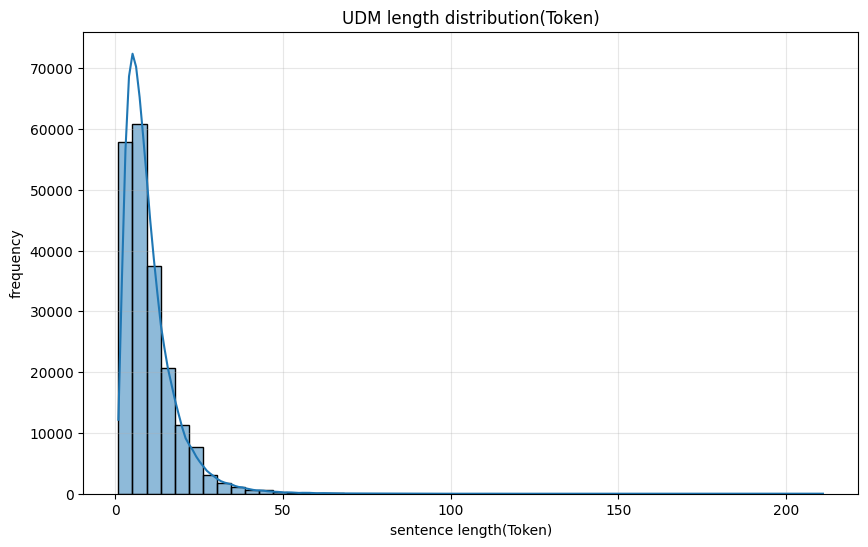

RU(based on Token):
  min: 1
  max: 222
  average: 10.64


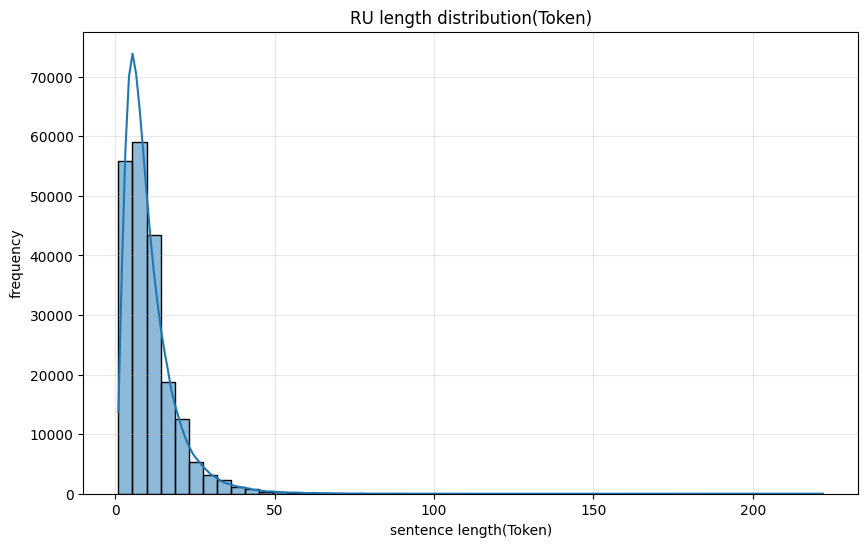

In [ ]:
## sentence length (по языкам)
for lang in ['udm', 'ru']:
    print(f"{lang.upper()}(based on Token):")
    lengths = stats[lang]['sent_lengths_tokens']
    print(f"  min: {np.min(lengths)}")
    print(f"  max: {np.max(lengths)}")
    print(f"  average: {np.mean(lengths):.2f}")

# гистограмма (based on Token)
    plt.figure(figsize=(10, 6))
    sns.histplot(lengths, bins=50, kde=True)
    plt.title(f'{lang.upper()} length distribution(Token)')
    plt.xlabel('sentence length(Token)')
    plt.ylabel('frequency')
    plt.grid(True, alpha=0.3)
    plt.show()

In [ ]:
## 2. Список самых частотных слов
for lang in ['udm', 'ru']:
    print(f"{lang.upper()}")
    # merge texts
    all_text = " ".join(df[lang].tolist())
    # split words
    words = re.findall(r'\b\w+\b', all_text.lower())

    word_freq = Counter(words)
    # top 20 words
    for word, count in word_freq.most_common(20):
        print(f"{word}: {count}")

UDM
но: 43474
со: 22654
нош: 13298
ик: 11828
мон: 10498
вал: 10071
ке: 8567
уг: 5476
гинэ: 5330
а: 5304
туж: 5079
соос: 4864
кадь: 4758
сое: 4526
та: 4247
озьы: 4241
солэн: 4117
ӧвӧл: 3948
ӧз: 3678
шуиз: 3652
RU
и: 44056
в: 24794
на: 18568
не: 18231
что: 13097
а: 12411
он: 11457
я: 11432
с: 10549
как: 8335
то: 6087
к: 6008
его: 5753
это: 5641
у: 5511
по: 5427
за: 5334
но: 5192
из: 4802
она: 4752


In [ ]:
## 3. Поиск шума
# regular expression
noise_patterns = {
    'html_tags': re.compile(r'<[^>]+>'),  # <...>
    'urls': re.compile(r'https?://\S+|www\.\S+'),  # http(s):// 或 www.
    'emails': re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'),
    # 'emojis': re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]'),
    'emojis': re.compile(r'[^\w\s,.!?;:\'"\-()а-яА-ЯёӝӟӥӧӵӴ]', re.UNICODE),  # Non-alphanumeric spaces and common Cyrillic/punctuation characters
    'special_chars': re.compile(r'[�※★☆♡♥♦♣♠♪♫►◄↕‼¶§▬↨↑↓→←∟↔▲▼]')  # special characters
}
# Initialization
noise_counts = {pattern: 0 for pattern in noise_patterns}
noise_counts['total_lines_with_noise'] = 0
noise_examples = {pattern: [] for pattern in noise_patterns}

for lang_col in ['udm', 'ru']:
    for sentence in df[lang_col]:
        line_has_noise = False
        for pattern_name, pattern_regex in noise_patterns.items():
            matches = pattern_regex.findall(sentence)
            if matches:
                noise_counts[pattern_name] += len(matches)
                line_has_noise = True
                if len(noise_examples[pattern_name]) < 3:
                    noise_examples[pattern_name].append((sentence, matches))
        if line_has_noise:
            noise_counts['total_lines_with_noise'] += 1

print(f"Количество строк: {noise_counts['total_lines_with_noise']} ({noise_counts['total_lines_with_noise'] / len(df) * 100:.2f}%)")
print("По типу шума:")
for pattern, count in noise_counts.items():
    if pattern != 'total_lines_with_noise':
        print(f"  {pattern}: {count}")


Количество строк: 68270 (67.04%)
По типу шума:
  html_tags: 0
  urls: 0
  emails: 0
  emojis: 104841
  special_chars: 191


In [ ]:
# samples(?)
print("samples:")
for pattern, examples in noise_examples.items():
    if examples:
        print(f"{pattern}:")
        for i, (sent, matches) in enumerate(examples):
            print(f"{i+1}:")
            print(f"sentence: {sent[:100]}...")
            print(f"item: {matches}")

samples:
emojis:
1:
sentence: Кылӥськылӥзы кӧлэм бере кежыр луэм куараос. Урод кылъёсын тышкаськем куара лек вандылӥз омырез. Адям...
item: ['—']
2:
sentence: Ӝыт, шунды пуксьыку, солэн горд сиосыз коркаослэн укно пиялаоссы вылын жадьыса чильпыран вакытэ, — ф...
item: ['—']
3:
sentence: Табере соослэн куараосазы кылӥськылӥз сэзьлык но, шумпотон но, — туннэлы быриз курадӟыса ужан, дораз...
item: ['—']
special_chars:
1:
sentence: 1 §. Вашкала адямиослэн улэмзы....
item: ['§']
2:
sentence: 2 §. Кызьы кылдӥзы рабовладельческой государствоос....
item: ['§']
3:
sentence: I. ЕГИПЕТ. 3 §. Египетлэн природаез но солэн калыкез....
item: ['§']


In [ ]:
## 4. duplicates
# in udmurt
udm_duplicates = df[df.duplicated(subset=['udm'], keep=False)]
print(f"Repetitive Udmurt sentences: {len(udm_duplicates)}")

# in russian
rus_duplicates = df[df.duplicated(subset=['ru'], keep=False)]
print(f"Repetitive Russian sentences: {len(rus_duplicates)}")

# in both
pair_duplicates = df[df.duplicated(subset=['udm', 'ru'], keep=False)]
print(f"Count of parallel sentence pairs (same content): {len(pair_duplicates)}")

Repetitive Udmurt sentences: 1639
Repetitive Russian sentences: 1595
Count of parallel sentence pairs (same content): 884


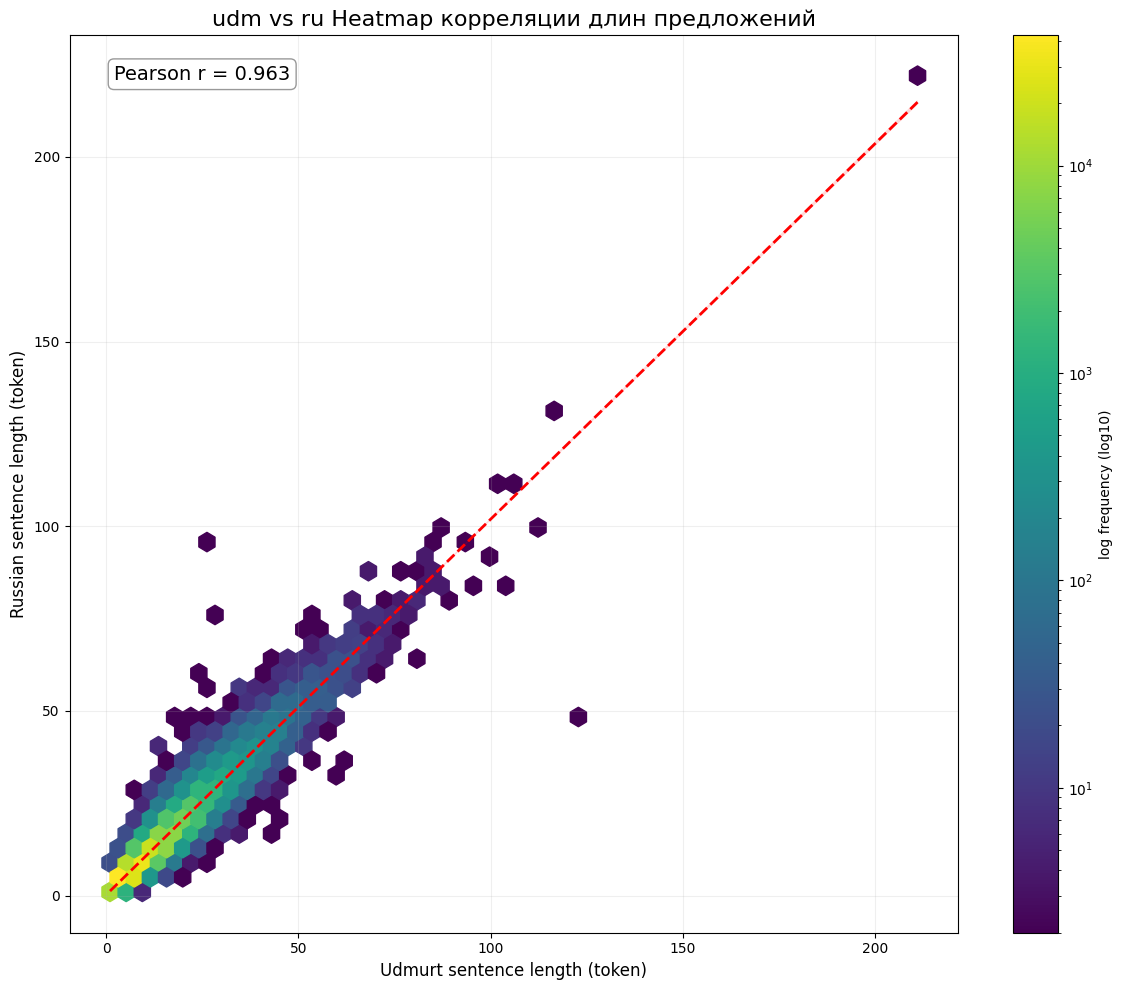

In [ ]:
# 5. Heatmap корреляции длин предложений
plt.figure(figsize=(12, 10))

# sentence length
udm_lengths = stats['udm']['sent_lengths_tokens']
rus_lengths = stats['ru']['sent_lengths_tokens']

# create hexbin heatmap
hb = plt.hexbin(udm_lengths, rus_lengths, gridsize=50, cmap='viridis', bins='log', mincnt=1)
plt.colorbar(hb, label='log frequency (log10)')

# linear regression
sns.regplot(x=udm_lengths, y=rus_lengths, scatter=False, color='red',
            line_kws={'linewidth': 2, 'linestyle': '--'})

# Pearson Correlation Coefficient
corr = np.corrcoef(udm_lengths, rus_lengths)[0, 1]
plt.annotate(f'Pearson r = {corr:.3f}', xy=(0.05, 0.95),
            xycoords='axes fraction', fontsize=14,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.title('udm vs ru Heatmap корреляции длин предложений', fontsize=16)
plt.xlabel('Udmurt sentence length (token)', fontsize=12)
plt.ylabel('Russian sentence length (token)', fontsize=12)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

UDM:


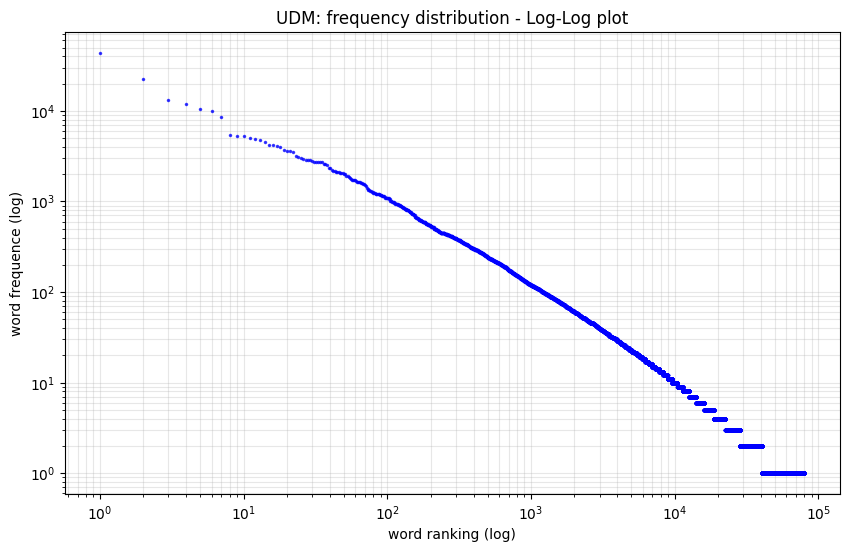

RU:


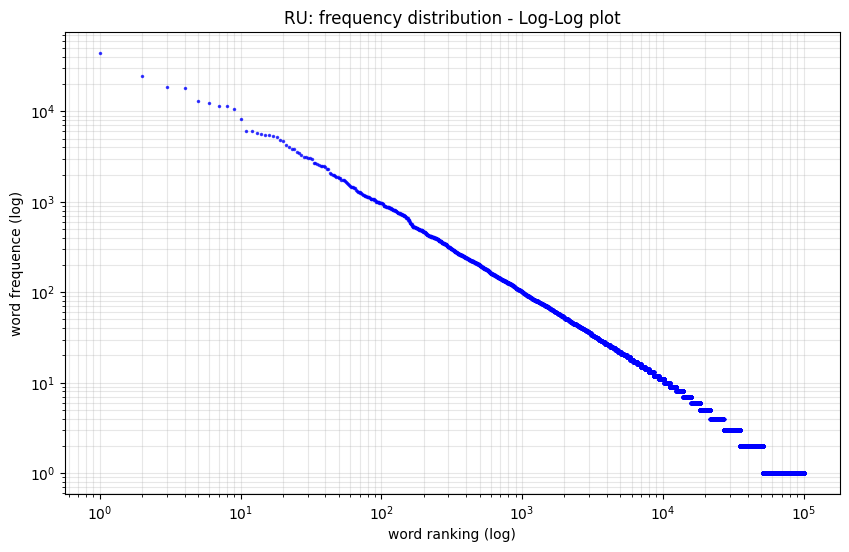

In [ ]:
# распределения частот слов (log-log plot)
for lang in ['udm', 'ru']:
    print(f"{lang.upper()}:")
    all_text = " ".join(df[lang].tolist()).lower()
    words = re.findall(r'\b\w+\b', all_text)
    word_freq = Counter(words)

    frequencies = sorted(word_freq.values(), reverse=True)
    ranks = np.arange(1, len(frequencies) + 1)

    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, 'b.', markersize=3, alpha=0.7)
    plt.title(f'{lang.upper()}: frequency distribution - Log-Log plot')
    plt.xlabel('word ranking (log)')
    plt.ylabel('word frequence (log)')
    plt.grid(True, which="both", ls="-", alpha=0.3)
    plt.show()